# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv('sinasc_RO_2019.csv')
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [ ]:
def classificar_apgar(apgar):

  if apgar >= 8:
       return 'normal'
  elif apgar >= 6:
       return 'asfixia leve'
  elif apgar >= 4:
       return 'asfixia moderada'
  else:
       return 'asfixia severa'

df['APGAR5_CLASSIFICADO'] = df['APGAR5'].apply(classificar_apgar)

In [ ]:
print(df.columns)
df['APGAR5_CLASSIFICADO'].value_counts()

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'APGAR5_CLASSIFI

APGAR5_CLASSIFICADO
normal              26463
asfixia leve          320
asfixia severa        177
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

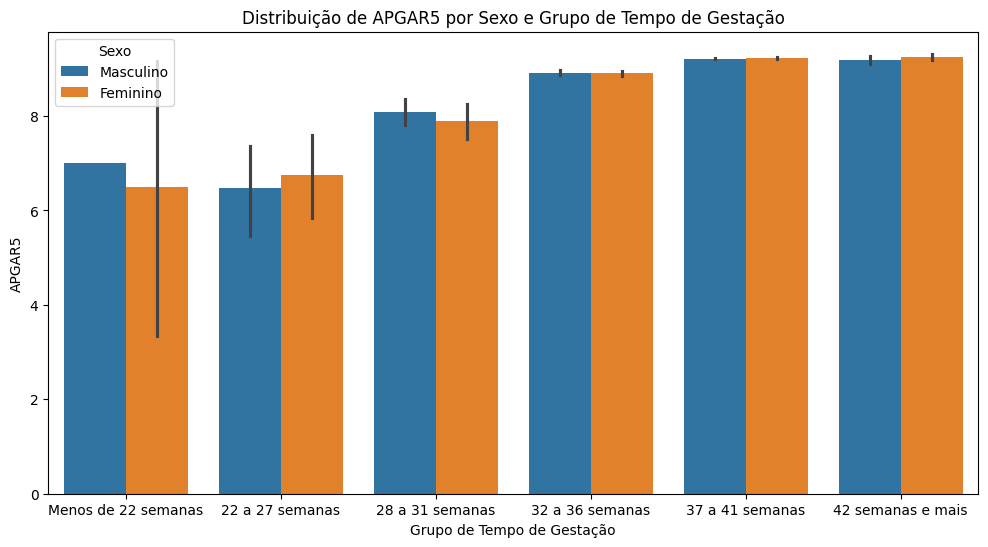

In [ ]:
plt.figure(figsize=(12, 6))
ordem = ['Menos de 22 semanas','22 a 27 semanas','28 a 31 semanas','32 a 36 semanas','37 a 41 semanas','42 semanas e mais'  ]
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=df, order = ordem)
plt.title('Distribuição de APGAR5 por Sexo e Grupo de Tempo de Gestação')
plt.xlabel('Grupo de Tempo de Gestação')
plt.ylabel('APGAR5')
plt.legend(title='Sexo')
plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [ ]:
cruzada = pd.crosstab(df['GESTACAO'], df['APGAR5'])

print(cruzada)

APGAR5               0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   \
GESTACAO                                                                    
22 a 27 semanas         7     0     8     6     1     0     2    10    24   
28 a 31 semanas         0     0     2     1     5     7     7    11    61   
32 a 36 semanas         2     2     2     2     8    11    17    56   362   
37 a 41 semanas         5    20     3     5     7    21    45   151  1417   
42 semanas e mais       1     0     0     0     0     1     1     5    44   
Menos de 22 semanas     1     0     1     0     0     0     0     1     0   

APGAR5                9.0   10.0  
GESTACAO                          
22 a 27 semanas         19     8  
28 a 31 semanas         55    13  
32 a 36 semanas       1307   465  
37 a 41 semanas      13565  7284  
42 semanas e mais      423   223  
Menos de 22 semanas      3     1  


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [ ]:
percent_cruzada = cruzada.div(cruzada.sum(axis=1), axis=0) * 100
print(percent_cruzada)

APGAR5                    0.0       1.0        2.0       3.0       4.0   \
GESTACAO                                                                  
22 a 27 semanas       8.235294  0.000000   9.411765  7.058824  1.176471   
28 a 31 semanas       0.000000  0.000000   1.234568  0.617284  3.086420   
32 a 36 semanas       0.089526  0.089526   0.089526  0.089526  0.358102   
37 a 41 semanas       0.022200  0.088798   0.013320  0.022200  0.031079   
42 semanas e mais     0.143266  0.000000   0.000000  0.000000  0.000000   
Menos de 22 semanas  14.285714  0.000000  14.285714  0.000000  0.000000   

APGAR5                   5.0       6.0        7.0        8.0        9.0   \
GESTACAO                                                                   
22 a 27 semanas      0.000000  2.352941  11.764706  28.235294  22.352941   
28 a 31 semanas      4.320988  4.320988   6.790123  37.654321  33.950617   
32 a 36 semanas      0.492390  0.760967   2.506714  16.204118  58.504924   
37 a 41 semanas    

####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

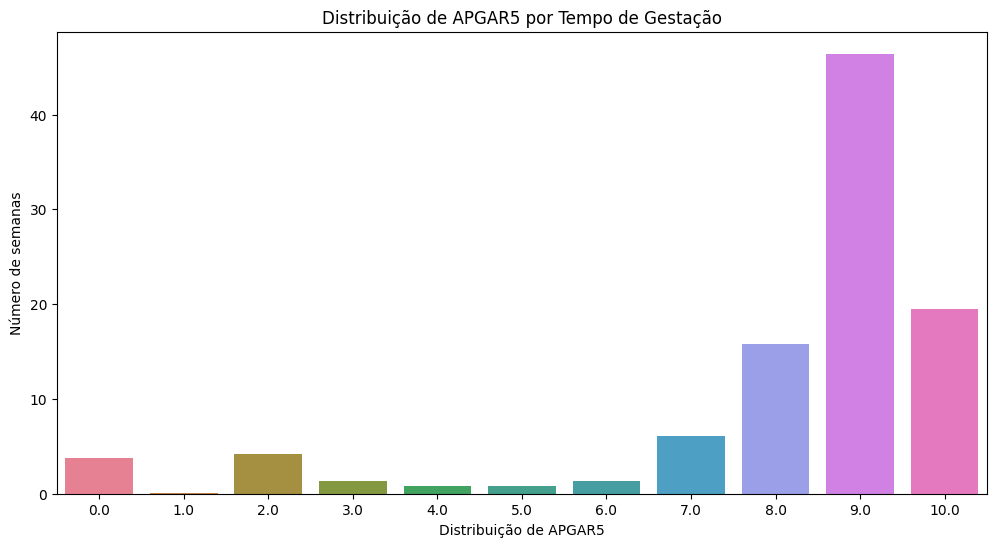

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(percent_cruzada,errorbar=None)

plt.title('Distribuição de APGAR5 por Tempo de Gestação')
plt.xlabel('Distribuição de APGAR5')
plt.ylabel('Número de semanas')

plt.show()

**Conclusão**

Sim, o gráfico corrobora com as afirmações dos médicos.

1.   A maior parte dos APGAR5 com a nota de 8 a 10, especialmente 9 possuem maiores tempos de gestações.
2.   Os Apgar de notas menores, mais críticas possuem um menor tempo de gestação, levando ao óbito ou a prematuridade dos partos.
*   Valido lembrar que APGAR5 não é o unico valor referente ao nascimento prematuro de um bebê.


#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

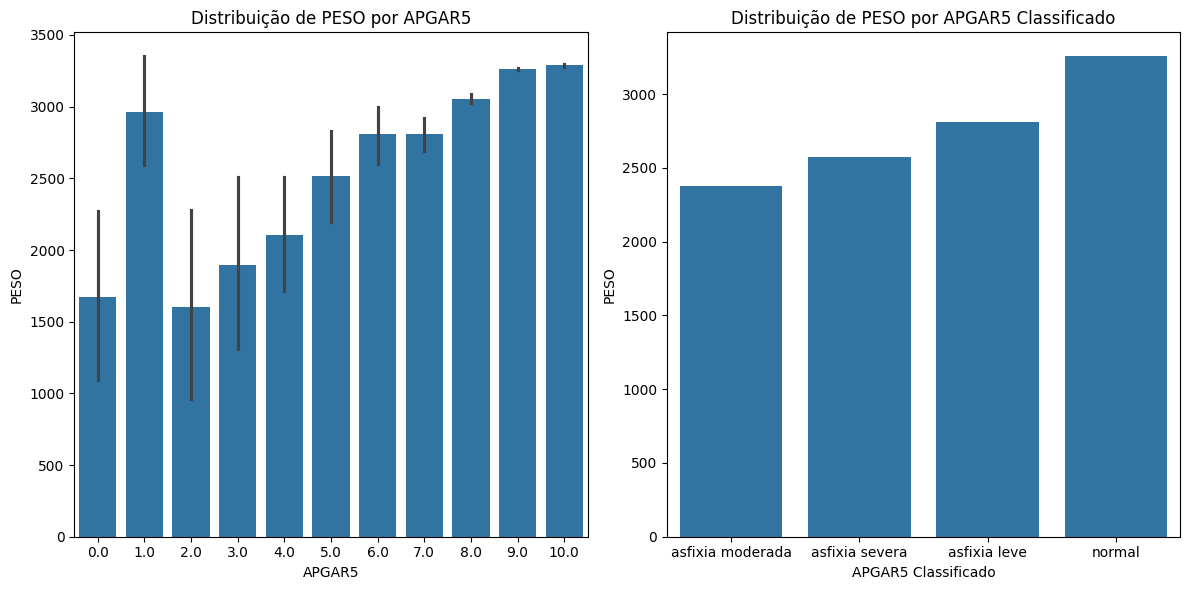

In [ ]:
plt.figure(figsize=(12, 6))

# Primeiro gráfico
plt.subplot(1, 2, 1)  # 1 linha, 2 colunas, primeiro gráfico
sns.barplot(x='APGAR5', y='PESO', data=df)
plt.title('Distribuição de PESO por APGAR5')
plt.xlabel('APGAR5')
plt.ylabel('PESO')

# Segundo gráfico
ordem = ['asfixia moderada','asfixia severa','asfixia leve', 'normal']
plt.subplot(1, 2, 2)  # 1 linha, 2 colunas, segundo gráfico
sns.barplot(x='APGAR5_CLASSIFICADO', y='PESO', order = ordem, errorbar=None, data=df)
plt.title('Distribuição de PESO por APGAR5 Classificado')
plt.xlabel('APGAR5 Classificado')
plt.ylabel('PESO')

plt.tight_layout()
plt.show()


**Conclusão**

*   Quanto menor a gravidade do grau de asfixia, maior o peso do bebê.
